In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.data_loader import DataLoader
from src.stepdetect import LRTStepChangeDetector
from src.reactor_volume import BioreactorVolumeCalculator
from src.utils import combine_online_and_offline_data, sort_time_data, calculate_time_intervals
%load_ext autoreload
%autoreload 2

In [4]:
path = r"C:\Projects\bioreactor_volume\data\measurements_2.xlsx"
 
loader = DataLoader(path=path)
online_df = loader.load_online_data(sheet_name="online")
offline_df = loader.load_offline_data(sheet_name="offline")

In [5]:
time = np.array(online_df['time_h'])
offline_samples = np.array(offline_df)
feeding_data = np.array(online_df.drop(columns=['time_h']))
feeding_data.shape

(500, 5)

In [6]:
# Maximum liklehood test parameters
delta=1
min_size=0.01

In [7]:
detector = LRTStepChangeDetector(delta=delta, min_size=min_size)
addition_indices = detector.apply_to_streams(feeding_data)

In [8]:
calculator = BioreactorVolumeCalculator(initial_volume=1000.0, F_in=0, F_out=0)
online_feedings = calculator.calculate_stream_volume(time, feeding_data, addition_indices)

In [9]:
combined_data = combine_online_and_offline_data(online_feedings, offline_samples)
sorted_material_addition_matrix = sort_time_data(combined_data)

In [10]:
sampling_intervals = calculate_time_intervals(time)
working_volume = calculator.calculate_volume(time=time, sampling_intervals=sampling_intervals, material_addition_matrix=sorted_material_addition_matrix)

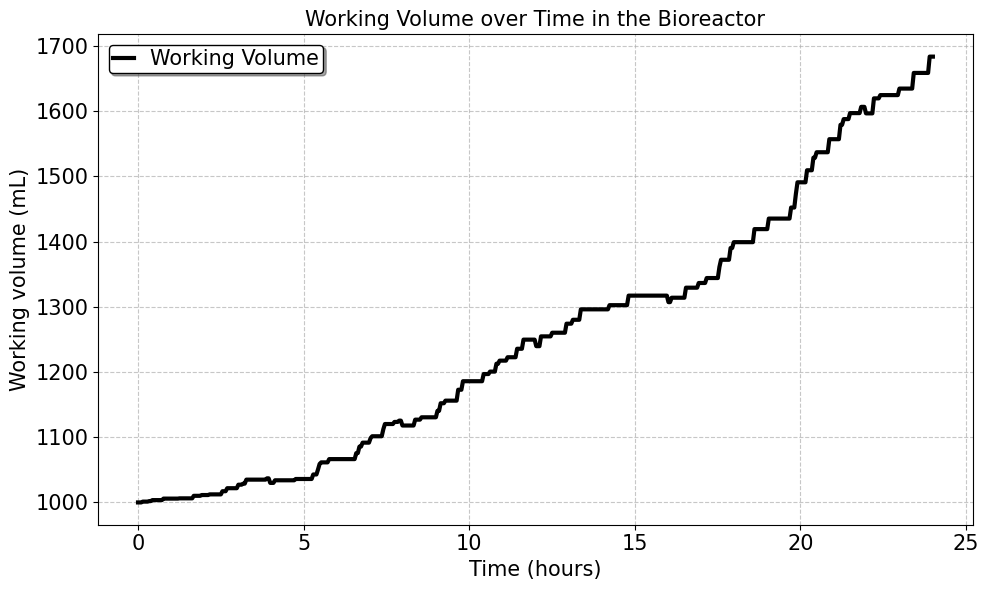

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(time, working_volume, linestyle='-', lw=3, color='k', label='Working Volume')
plt.title('Working Volume over Time in the Bioreactor', fontsize=15)
plt.xlabel('Time (hours)', fontsize=15)
plt.ylabel('Working volume (mL)', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={"size": 15},
        fontsize=12,
        frameon=True,
        framealpha=1.0,
        edgecolor="k",
        borderpad=0.2,
        handlelength=1,
        shadow=True)
plt.tight_layout()
plt.show()